# **This file contains the dataset to classify the types of fault.**

# **Inputs - [Ia,Ib,Ic,Va,Vb,Vc]**
Ia = Current in line A

Ib = Current in line B

Ic = Current in line C

Va = Voltage in line A

Vb = Voltage in line B

Vc = Voltage in line C

# **Output: [G C B A]**

[0 0 0 0] - No Fault

[1 0 0 1] - LG fault (Between Phase A and Ground)

[0 0 1 1] - LL fault (Between Phase A and Phase B)

[1 0 1 1] - LLG Fault (Between Phases A,B and Ground)

[0 1 1 1] - LLL Fault (Between all three phases)

[1 1 1 1] - LLLG fault (Three phase symmetrical fault)

Here, we conclude that there are 6 types of faults, hence 6 output classes.

# **Importing Libraries**

In [114]:
''' Install these Libraries
pip install pandas
pip install numpy
pip install scikit-learn
pip install matplotlib
pip install seaborn
pip install jinja2
from IPython.display import clear_output
!pip3 install -U lazypredict
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from tabulate import tabulate

In [115]:
# Load the dataset
df = pd.read_csv('classData.csv')
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.29,-9.68,85.80,0.40,-0.13,-0.27
1,1,0,0,1,-336.19,-76.28,18.33,0.31,-0.12,-0.19
2,1,0,0,1,-502.89,-174.65,-80.92,0.27,-0.11,-0.15
3,1,0,0,1,-593.94,-217.70,-124.89,0.24,-0.10,-0.13
4,1,0,0,1,-643.66,-224.16,-132.28,0.21,-0.10,-0.11


In [116]:
# Check Dataframe information
print('--- Dataframe information ---\n')
df.info()

--- Dataframe information ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [117]:
# Null Data in every column
print('---  Null Data in DataFrame of every column ---\n')
print(df.isnull().sum())
# Total Null values in Dataset
print('\n--- Total Null values in DataFrame ---\n')
df.isnull().sum().sum()

---  Null Data in DataFrame of every column ---

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

--- Total Null values in DataFrame ---



0

In [118]:
# Check Duplicate data in all DataFrame
print("Number Of duplicates:",(df.duplicated().sum()))

Number Of duplicates: 0


In [119]:
# Check total rows and Columns in data frame
print("Total number of rows and columns")
df.shape

Total number of rows and columns


(7861, 10)

In [120]:
# Numeric features
print("The reason why the standard deviation is so big is negative values. It increases the variance of the values significantly.\n")
df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='rainbow')\
                     .bar(subset=["max"], color='red')\
                     .bar(subset=["mean",], color='blue')

The reason why the standard deviation is so big is negative values. It increases the variance of the values significantly.



,count,mean,std,min,25%,50%,75%,max
Ia,7861.000000,13.721194,464.741671,-883.542316,-119.802518,2.042805,227.246377,885.738571
Ib,7861.000000,-44.845268,439.269195,-900.526951,-271.845947,5.513317,91.194282,889.868884
Ic,7861.000000,34.392394,371.107412,-883.357762,-61.034219,-4.326711,49.115141,901.274261
B,7861.000000,0.555527,0.496939,0.000000,0.000000,1.000000,1.000000,1.000000
G,7861.000000,0.432006,0.495387,0.000000,0.000000,0.000000,1.000000,1.000000
A,7861.000000,0.571429,0.494903,0.000000,0.000000,1.000000,1.000000,1.000000
C,7861.000000,0.411271,0.492095,0.000000,0.000000,0.000000,1.000000,1.000000
Vb,7861.000000,0.001152,0.313437,-0.608016,-0.159507,0.001620,0.153507,0.627875
Va,7861.000000,-0.007667,0.289150,-0.620748,-0.130287,-0.005290,0.111627,0.595342



Correlation Matrix:
      Ia    Ib    Ic    Va    Vb    Vc
Ia  1.00 -0.37 -0.28  0.04 -0.27  0.25
Ib -0.37  1.00 -0.53  0.03  0.03 -0.06
Ic -0.28 -0.53  1.00 -0.07 -0.06  0.12
Va  0.04  0.03 -0.07  1.00 -0.48 -0.45
Vb -0.27  0.03 -0.06 -0.48  1.00 -0.57
Vc  0.25 -0.06  0.12 -0.45 -0.57  1.00


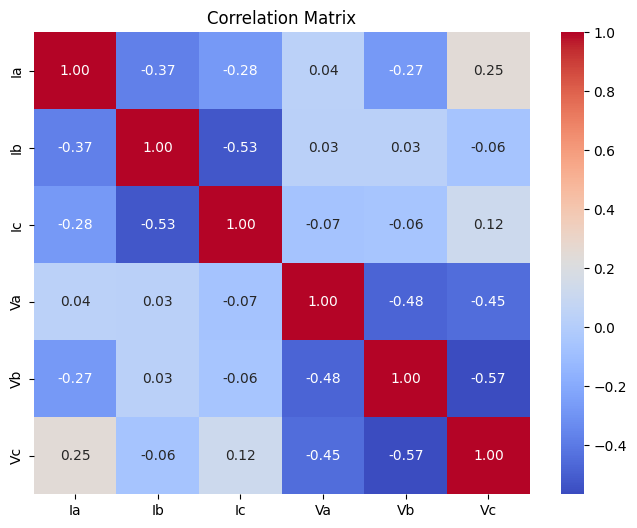

In [121]:
# Correlation matrix

print("\nCorrelation Matrix:")
features = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
correlation_matrix = df[features].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

       Count
False   5496
True    2365


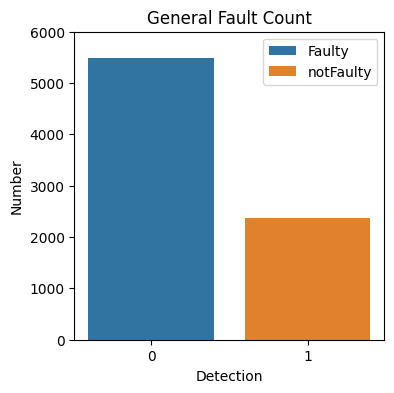

In [122]:
no_faults = ((df["G"] == 0) & (df["C"] == 0) & (df["B"] == 0) & (df["B"] == 0)).value_counts()
no_faults_df = pd.DataFrame(no_faults)
no_faults_df = no_faults_df.rename(columns = {"count":"Count"})
print(no_faults_df)
cmap = ["#3274a1", "#e1812c", "#3a923a", "#c03d3e", "#857aab", "#8d7866"]
plt.figure(figsize = (4, 4))
plt.bar(x = no_faults_df.index.to_list(),
        height = no_faults_df.Count,
        label = ["Faulty", "notFaulty"],
        color = cmap)
plt.xlabel("Detection")
plt.ylabel("Number")
plt.title("General Fault Count")
plt.xticks(no_faults_df.index.to_list())
plt.yticks(np.arange(0, 6001, 1000))
plt.legend(bbox_to_anchor = (1, 1), loc = "best")
plt.show();

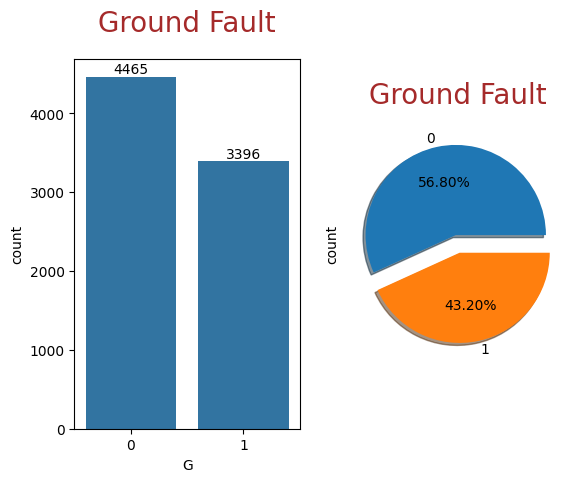

In [123]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=df)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',pad=20);



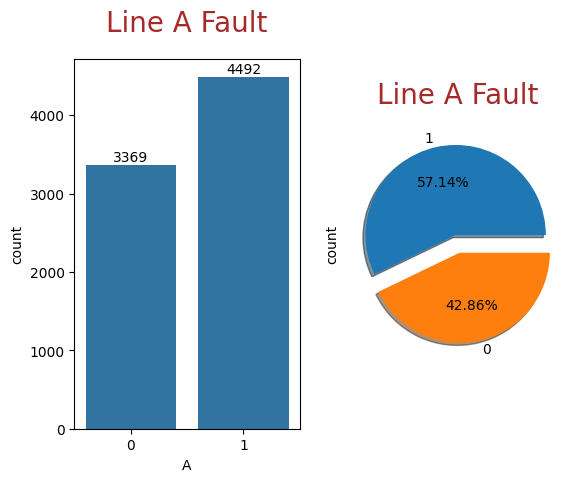

In [124]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='A', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line A Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df['A'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line A Fault", fontsize = 20,color='Brown',pad=20);

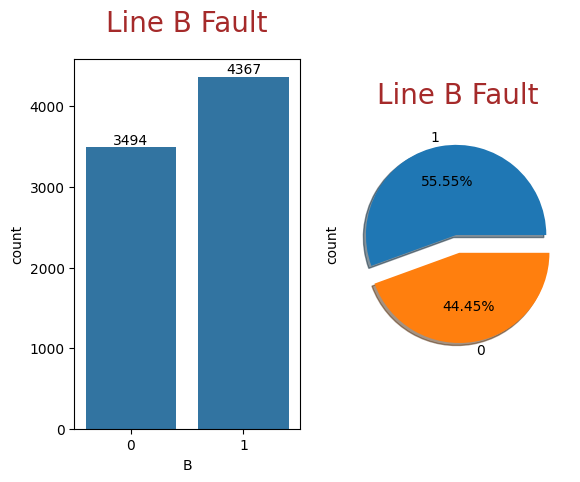

In [125]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='B', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line B Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df['B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line B Fault", fontsize = 20,color='Brown',pad=20);

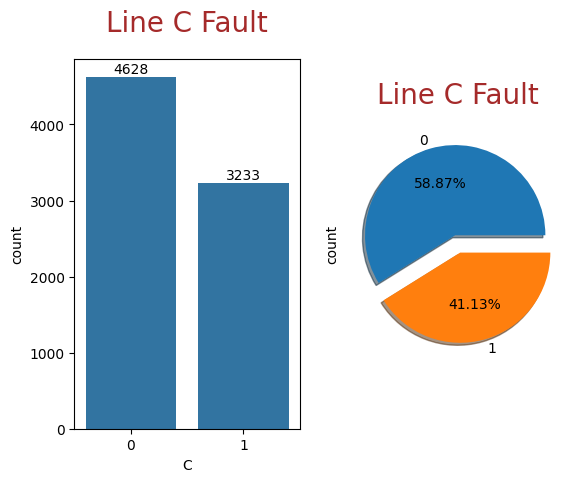

In [126]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='C', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line C Fault", fontsize=20,color = 'Brown',pad=20)

ax =plt.subplot(1,2,2)
ax=df['C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line C Fault", fontsize = 20,color='Brown',pad=20);

# **Combing all fault together in one Fault_Type**

In [127]:
print("Combing all fault together in one Fault_Type\n")
df['Fault_Type'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')
df.head().style.set_properties(**{'background-color': 'green',
                           'color': 'white',
                           'border-color': 'darkblack'})

Combing all fault together in one Fault_Type



,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


# **Giving the proper name to the fault according to the data description provided above**

In [128]:
print("Giving the proper name to the fault according to the data\n")
df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'
df.sample(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


Giving the proper name to the fault according to the data



,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7718,0,0,0,0,5.199585,77.846581,-85.953104,-0.565490,0.508704,0.056786,NO Fault
4050,0,1,1,1,-585.948301,866.041388,-278.060727,0.014988,0.026826,-0.041814,Line A Line B Line C
6177,0,0,0,0,-50.853481,97.583076,-50.100544,-0.544043,0.031224,0.512818,NO Fault
2893,0,1,1,0,-68.229958,239.736414,-169.155701,-0.412528,-0.041229,0.453757,Line B to Line C Fault
4273,0,1,1,1,778.127440,-751.239289,-24.898172,-0.000059,-0.047480,0.047539,Line A Line B Line C
2090,1,0,1,1,323.509209,-879.259071,-47.206110,-0.027542,0.108984,-0.081443,Line A Line B to Ground Fault
1729,1,0,1,1,729.849544,-798.369135,-19.460785,-0.004029,-0.118079,0.122108,Line A Line B to Ground Fault
7745,0,0,0,0,-21.479903,90.955875,-72.375378,-0.618154,0.318885,0.299269,NO Fault
3818,0,1,1,1,196.520660,-843.546778,649.104299,-0.032252,-0.007651,0.039903,Line A Line B Line C
4354,0,1,1,1,179.840371,-211.228689,33.524834,0.040451,-0.533872,0.493421,Line A Line B Line C


In [129]:
total_fault_types = len(df['Fault_Type'].unique())
print("Total Fault Types:", total_fault_types)
df['Fault_Type'].value_counts(ascending=False)

Total Fault Types: 6


Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

# **Number of faults in the system according to their Fault_Type**

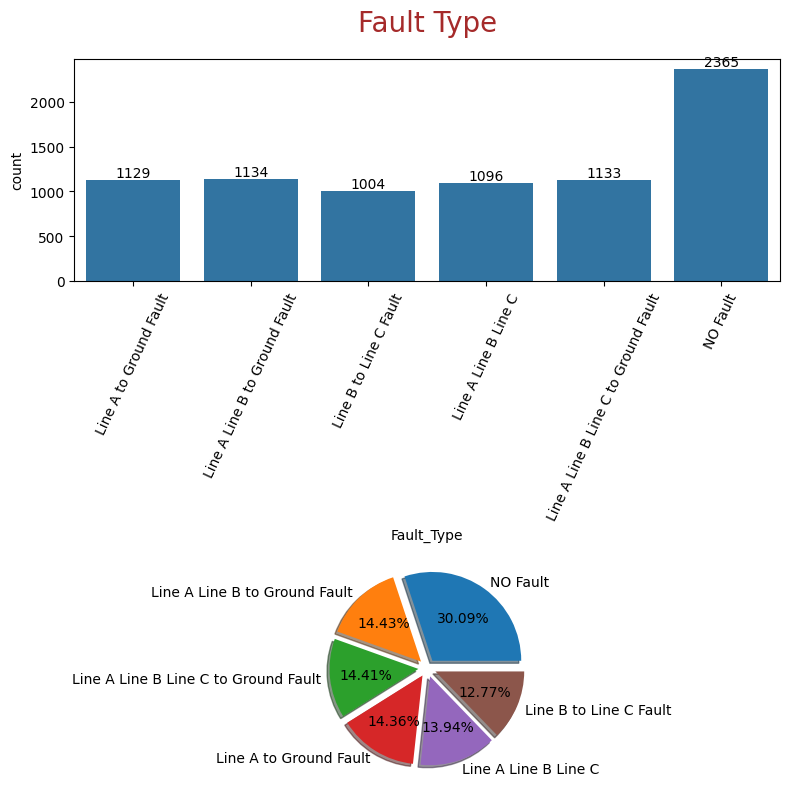

In [130]:
ax = plt.figure(figsize = (8,8))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()
ax =plt.subplot(2,1,2)
ax=df['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

Current graph has large fluctuation therefore fault occured.



Text(0.5, 1.0, 'Current graph has large fluctuation')

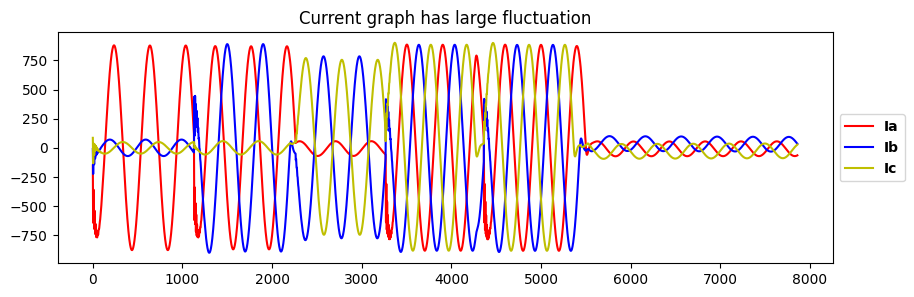

In [131]:
print("Current graph has large fluctuation therefore fault occured.\n")
plt.figure(figsize = (10,3))
plt.plot(df["Ia"] ,'r' ,label='Ia')
plt.plot(df["Ib"] ,'b' ,label='Ib')
plt.plot(df["Ic"] ,'y' ,label='Ic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Current graph has large fluctuation")

Voltage graph has large fluctuation therefore fault occured.



Text(0.5, 1.0, 'Voltage graph has large fluctuation')

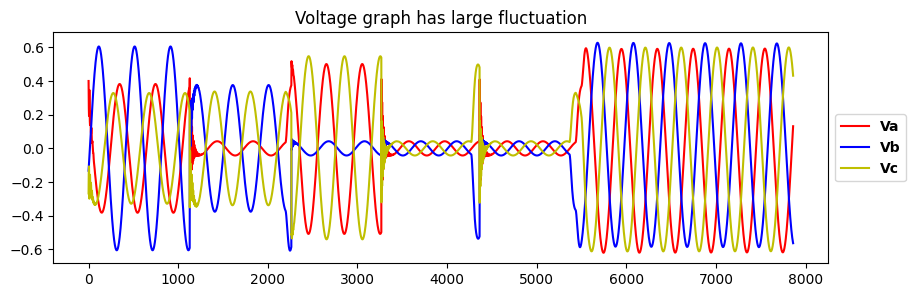

In [132]:
print("Voltage graph has large fluctuation therefore fault occured.\n")
plt.figure(figsize = (10,3))
plt.plot(df["Va"] ,'r' ,label='Va')
plt.plot(df["Vb"] ,'b' ,label='Vb')
plt.plot(df["Vc"] ,'y' ,label='Vc')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Voltage graph has large fluctuation")

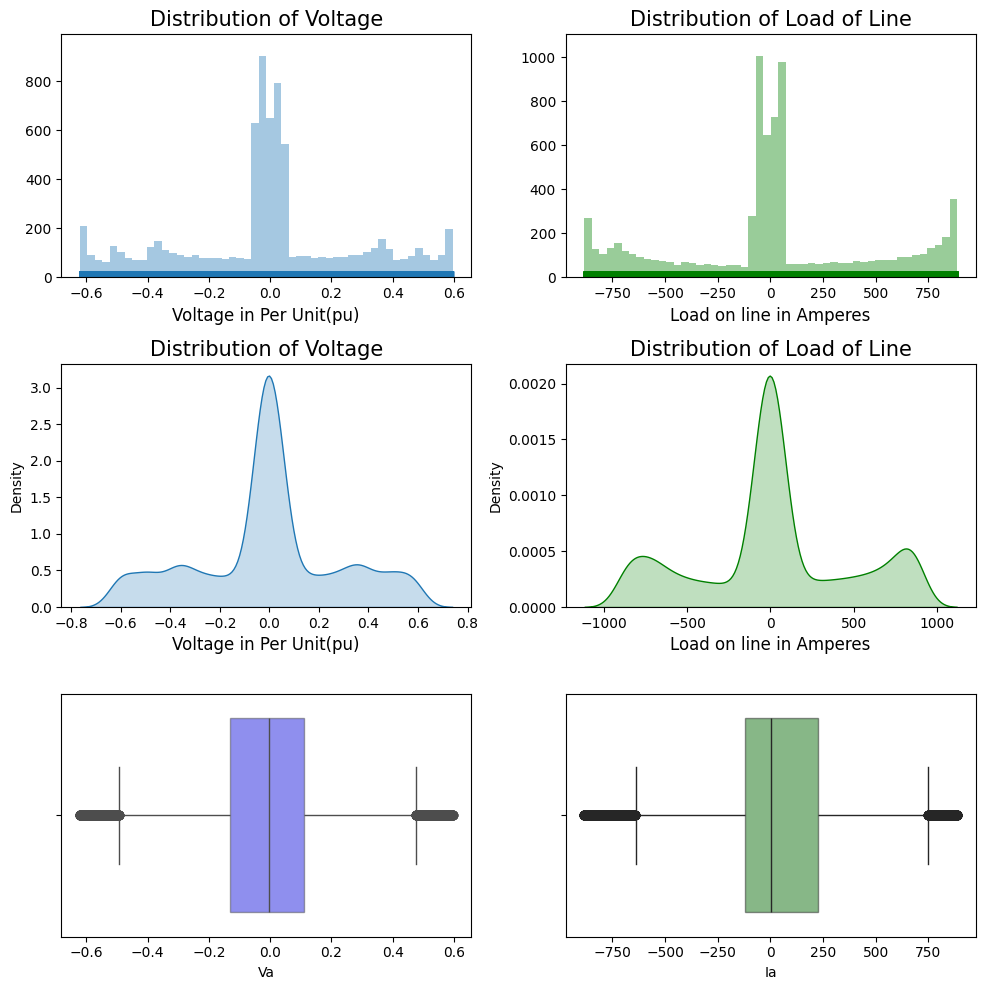

In [133]:
plt.figure(figsize= (15,10))
#Histograms
plt.subplot(3,3,1)
sns.distplot(df['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(df['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(df['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(df['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = df['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = df['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

# **Data Procesing**
## **Separating Faults into different Categories**

# 1. No Fault (Healthy System)

In [134]:
No_Fault = df[df['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6620,0,0,0,0,-71.050968,74.649061,-6.828543,-0.243299,-0.350698,0.593997,NO Fault
6112,0,0,0,0,9.699128,78.752905,-91.844095,-0.541822,0.542994,-0.001172,NO Fault
6741,0,0,0,0,1.391039,-25.668464,21.084322,0.591385,-0.313485,-0.277900,NO Fault
5579,0,0,0,0,43.727439,-27.054522,-14.400966,0.507561,0.030900,-0.538461,NO Fault
6609,0,0,0,0,-68.245400,82.438503,-17.426970,-0.336295,-0.262760,0.599055,NO Fault


Text(0.5, 1.0, 'Current graph is symmetrical at No_Fault ')

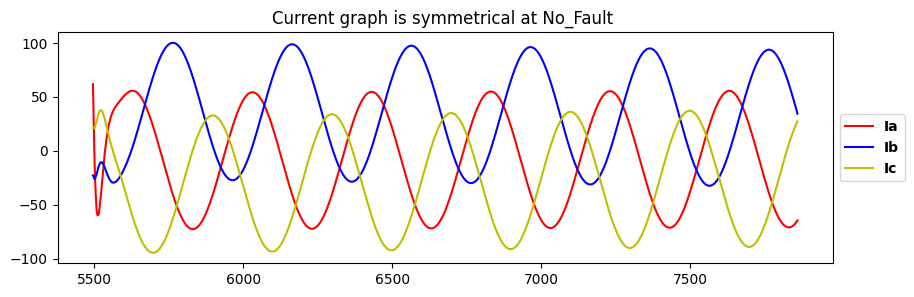

In [135]:
ax = plt.figure(figsize = (10,3))
ax = plt.plot(No_Fault["Ia"],'r', label='Ia')
ax = plt.plot(No_Fault["Ib"],'b', label='Ib')
ax = plt.plot(No_Fault["Ic"],'y', label='Ic');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5), prop={'weight': 'bold'})
plt.title("Current graph is symmetrical at No_Fault ")


Text(0.5, 1.0, 'Voltage graph is symmetrical at No_Fault ')

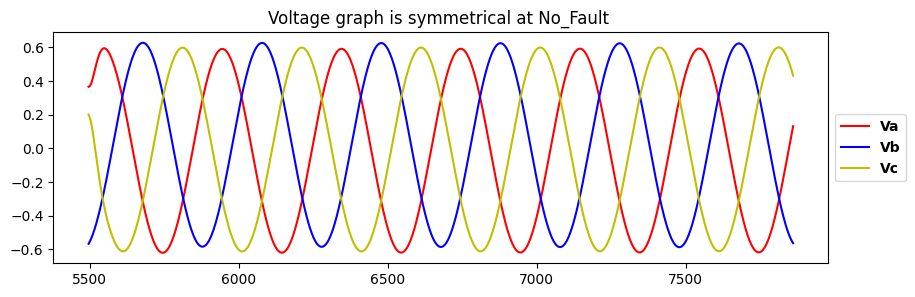

In [136]:
ax = plt.figure(figsize = (10,3))
ax = plt.plot(No_Fault["Va"],'r', label='Va')
ax = plt.plot(No_Fault["Vb"],'b', label='Vb')
ax = plt.plot(No_Fault["Vc"],'y', label='Vc');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Voltage graph is symmetrical at No_Fault ")

# **2. Faulty System with Line A to Ground Fault**

In [137]:
print("Faulty System with Line A to Ground Fault")
Line_AG_Fault = df[df['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.sample(5).style.set_properties(**{'background-color': 'brown',
                           'color': 'white',
                           'border-color': 'darkblack'})

Faulty System with Line A to Ground Fault


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
402,1,0,0,1,-751.550391,-69.453051,24.270314,0.245870,-0.114301,-0.131569,Line A to Ground Fault
335,1,0,0,1,21.765779,-46.298437,49.928516,0.376628,-0.573500,0.196872,Line A to Ground Fault
463,1,0,0,1,-803.254341,-28.738251,-21.744157,-0.098617,0.421107,-0.322490,Line A to Ground Fault
227,1,0,0,1,869.835318,58.921234,-5.732236,-0.114811,-0.122111,0.236922,Line A to Ground Fault
628,1,0,0,1,869.888754,58.305747,-4.944551,-0.109144,-0.131418,0.240562,Line A to Ground Fault


Text(0.5, 1.0, 'Current Graph of Line_AG_Fault')

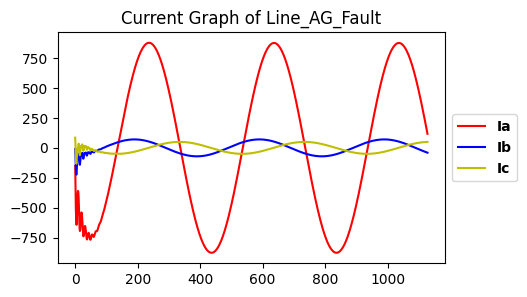

In [138]:
ax = plt.figure(figsize = (5,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r', label='Ia')
ax = plt.plot(Line_AG_Fault["Ib"],'b', label='Ib')
ax = plt.plot(Line_AG_Fault["Ic"],'y', label='Ic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Current Graph of Line_AG_Fault")

Text(0.5, 1.0, 'Voltage Graph of Line_AG_Fault')

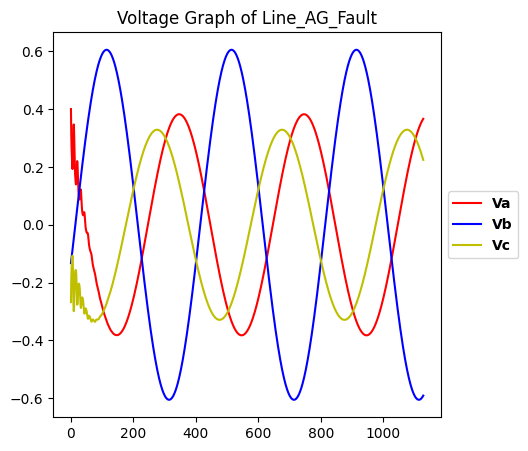

In [139]:
ax = plt.figure(figsize = (5,5))
ax = plt.plot(Line_AG_Fault["Va"],'r', label='Va')
ax = plt.plot(Line_AG_Fault["Vb"],'b', label='Vb')
ax = plt.plot(Line_AG_Fault["Vc"],'y' ,label='Vc')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Voltage Graph of Line_AG_Fault")

# **3. Faulty System with Line A ,Line B to Ground Fault**

In [140]:
Line_ABG_Fault = df[df['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head().style.set_properties(**{'background-color': 'brown',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


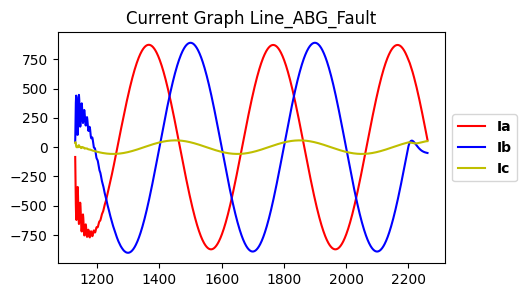

In [141]:
plt.figure(figsize=(5, 3))
plt.plot(Line_ABG_Fault["Ia"], 'r', label='Ia')
plt.plot(Line_ABG_Fault["Ib"], 'b', label='Ib')
plt.plot(Line_ABG_Fault["Ic"], 'y', label='Ic')
plt.title("Current Graph Line_ABG_Fault")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.show()


Text(0.5, 1.0, 'Voltage Graph Line_ABG_Fault')

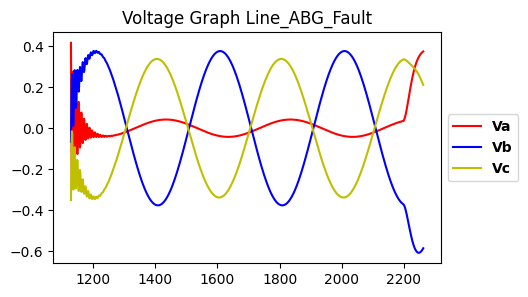

In [142]:
ax = plt.figure(figsize = (5,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r', label='Va')
ax = plt.plot(Line_ABG_Fault["Vb"],'b', label='Vb')
ax = plt.plot(Line_ABG_Fault["Vc"],'y', label='Vc')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Voltage Graph Line_ABG_Fault")

# **4. Faulty System with Line B to Line C**

In [143]:
Line_BC_Fault = df[df['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head().style.set_properties(**{'background-color': 'brown',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


Text(0.5, 1.0, 'Current Graph Line_BC_Fault')

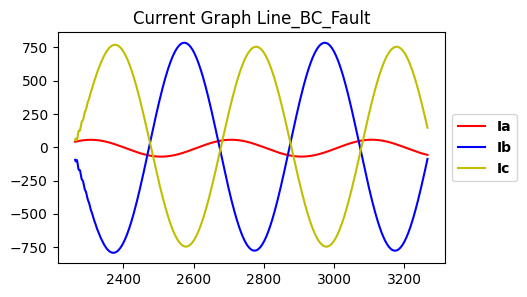

In [144]:
ax = plt.figure(figsize = (5,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r', label='Ia')
ax = plt.plot(Line_BC_Fault["Ib"],'b', label='Ib')
ax = plt.plot(Line_BC_Fault["Ic"],'y', label='Ic');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Current Graph Line_BC_Fault")

Text(0.5, 1.0, 'Volatge Graph Line_BC_Fault')

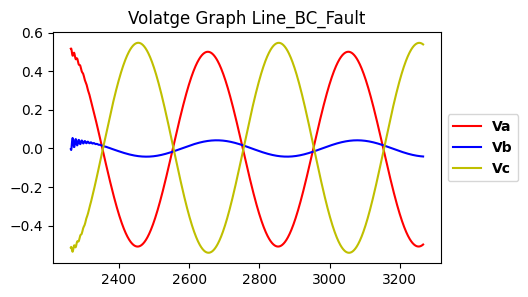

In [145]:
ax = plt.figure(figsize = (5,3))
ax = plt.plot(Line_BC_Fault["Va"],'r', label='Va')
ax = plt.plot(Line_BC_Fault["Vb"],'b', label='Vb')
ax = plt.plot(Line_BC_Fault["Vc"],'y', label='Vc');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Volatge Graph Line_BC_Fault")

# 5. Faulty System with Line A - Line B - Line **C**

In [146]:
Line_ABC_Fault = df[df['Fault_Type'] == 'Line A Line B Line C' ]
Line_ABC_Fault.head().style.set_properties(**{'background-color': 'brown',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C


Text(0.5, 1.0, 'Current Graph Line_ABC_Fault')

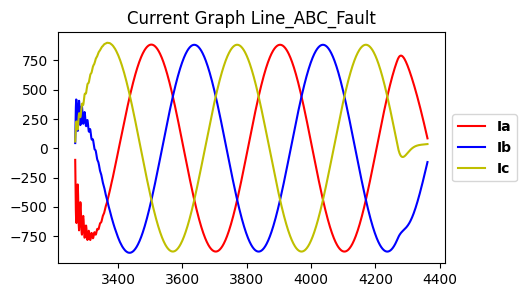

In [147]:
ax = plt.figure(figsize = (5,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r', label ='Ia')
ax = plt.plot(Line_ABC_Fault["Ib"],'b', label ='Ib')
ax = plt.plot(Line_ABC_Fault["Ic"],'y', label ='Ic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Current Graph Line_ABC_Fault")

Text(0.5, 1.0, 'Voltage Graph Line_ABC_Fault')

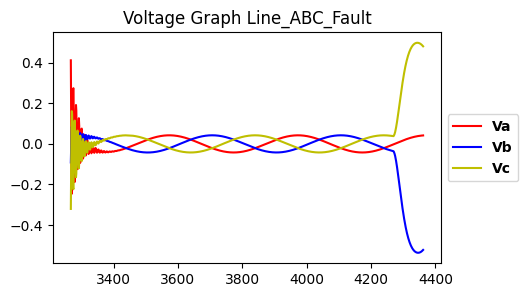

In [148]:
ax = plt.figure(figsize = (5,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r', label ='Va')
ax = plt.plot(Line_ABC_Fault["Vb"],'b', label ='Vb')
ax = plt.plot(Line_ABC_Fault["Vc"],'y', label ='Vc')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Voltage Graph Line_ABC_Fault")


# 6. Faulty System with Line A - Line B - Line C - **Ground**

In [149]:
Line_ABCG_Fault = df[df['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head().style.set_properties(**{'background-color': 'brown',
                           'color': 'white',
                           'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


Text(0.5, 1.0, 'Current Graph Line_ABCG_Fault')

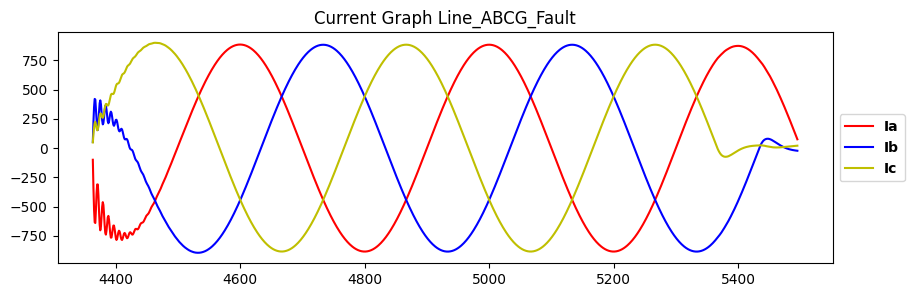

In [150]:
ax = plt.figure(figsize = (10,3))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r', label ='Ia')
ax = plt.plot(Line_ABCG_Fault["Ib"],'b', label ='Ib')
ax = plt.plot(Line_ABCG_Fault["Ic"],'y', label ='Ic')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Current Graph Line_ABCG_Fault")

Text(0.5, 1.0, 'Voltage Graph Line_ABCG_Fault')

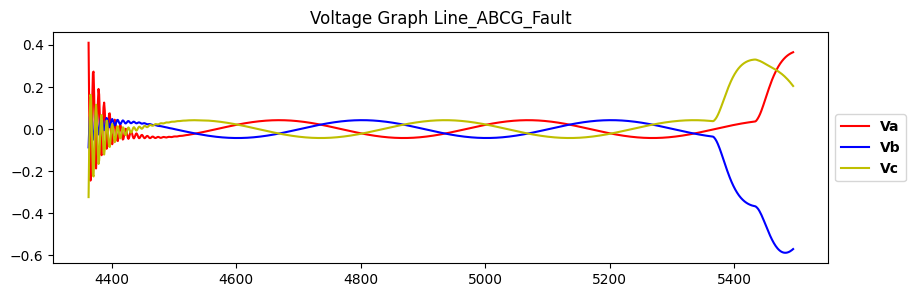

In [151]:
ax = plt.figure(figsize = (10,3))
ax = plt.plot(Line_ABCG_Fault["Va"],'r', label ='Va')
ax = plt.plot(Line_ABCG_Fault["Vb"],'b', label ='Vb')
ax = plt.plot(Line_ABCG_Fault["Vc"],'y', label ='Vc')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'weight': 'bold'})
plt.title("Voltage Graph Line_ABCG_Fault")


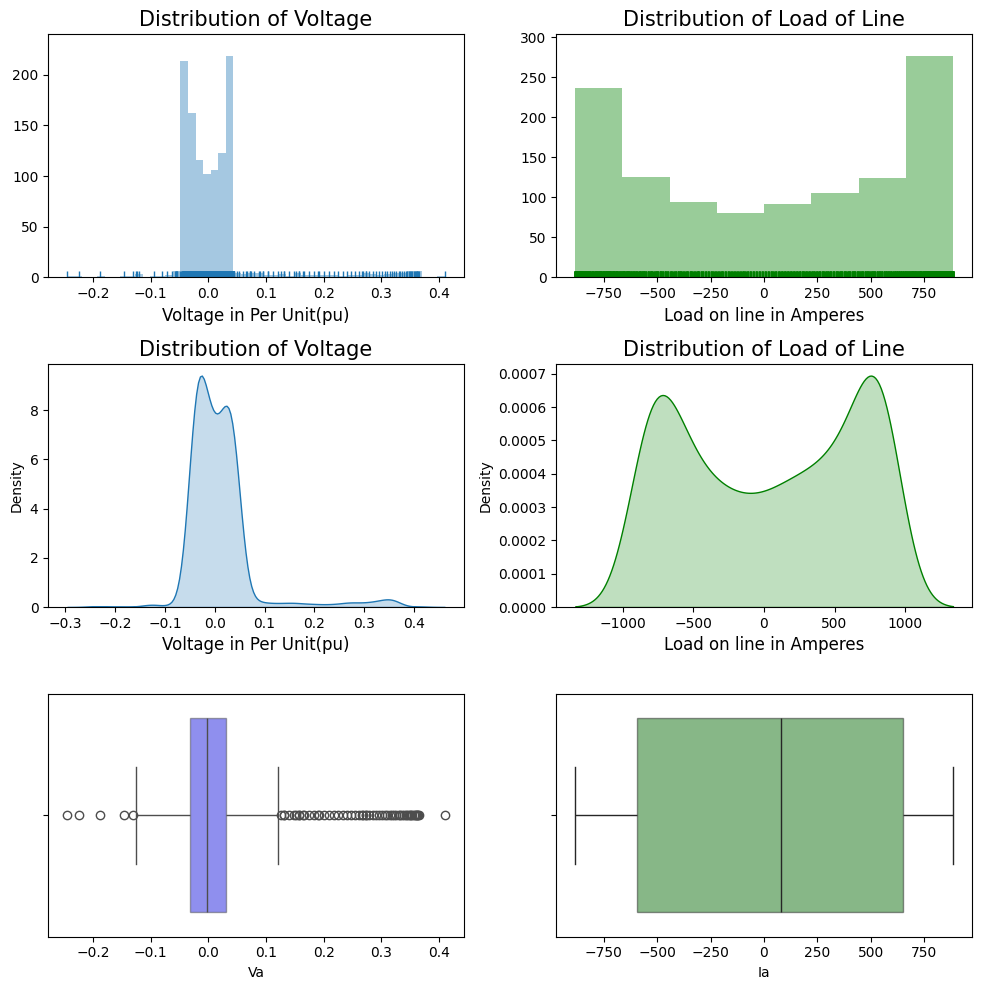

In [152]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(Line_ABCG_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(Line_ABCG_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(Line_ABCG_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(Line_ABCG_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = Line_ABCG_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = Line_ABCG_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

  # **Feature and Label seperation**
# Categorical to Numerical conversion

In [153]:
# Define the custom mapping of fault types to numerical labels
fault_mapping = {
    'NO Fault': 0,
    'Line A to Ground Fault': 1,
    'Line B to Line C Fault': 2,
    'Line A Line B to Ground Fault': 3,
    'Line A Line B Line C': 4,
    'Line A Line B Line C to Ground Fault': 5
}

# Map fault types to numerical labels using the custom mapping
df['Fault_Type_Encoded'] = df['Fault_Type'].map(fault_mapping)

# Display the DataFrame with encoded fault types
print(df[['Fault_Type', 'Fault_Type_Encoded']].sample(10))


                                Fault_Type  Fault_Type_Encoded
4420  Line A Line B Line C to Ground Fault                   5
3277                  Line A Line B Line C                   4
508                 Line A to Ground Fault                   1
6462                              NO Fault                   0
7648                              NO Fault                   0
7527                              NO Fault                   0
1989         Line A Line B to Ground Fault                   3
7439                              NO Fault                   0
3844                  Line A Line B Line C                   4
2209         Line A Line B to Ground Fault                   3


In [154]:
from sklearn.preprocessing import StandardScaler

# Scaling Data
scaler = StandardScaler()

# Convert all columns to numeric
X = df.drop(['Fault_Type', 'A', 'B', 'C', 'G', 'Fault_Type_Encoded'], axis=1)
y = df['Fault_Type']

scaled_data = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=123)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (6288, 6)
X Test  :  (1573, 6)
Y Train :  (6288,)
Y Test  :  (1573,)


In [155]:
X = df.drop(['Fault_Type','A','B','C','G','Fault_Type_Encoded'], axis=1)
y = df['Fault_Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

# **Model Selection**
1. Logistic Regression
2. Naive Byes
3. Decision Tree
4. Random Forest
5. Support Vector Machine


In [156]:
# Assuming you have defined X and y
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train different models
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_accuracy = round(lr.score(X_train, y_train) * 100, 2)
lr_test_accuracy = round(lr.score(X_test, y_test) * 100, 2)
lr_report = classification_report(y_test, lr.predict(X_test))

# Support Vector Machines (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_train_accuracy = round(svm_classifier.score(X_train, y_train) * 100, 2)
svm_test_accuracy = round(svm_classifier.score(X_test, y_test) * 100, 2)
svm_report = classification_report(y_test, svm_classifier.predict(X_test))

# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_train_accuracy = round(nb_classifier.score(X_train, y_train) * 100, 2)
nb_test_accuracy = round(nb_classifier.score(X_test, y_test) * 100, 2)
nb_report = classification_report(y_test, nb_classifier.predict(X_test))

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_train_accuracy = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_test_accuracy = round(decision_tree.score(X_test, y_test) * 100, 2)
decision_report = classification_report(y_test, decision_tree.predict(X_test))

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_train_accuracy = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_test_accuracy = round(random_forest.score(X_test, y_test) * 100, 2)
random_forest_report = classification_report(y_test, random_forest.predict(X_test))

# Create a DataFrame for model performance
models_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    'Training Accuracy': [lr_train_accuracy, svm_train_accuracy, nb_train_accuracy, decision_train_accuracy, random_forest_train_accuracy],
    'Testing Accuracy': [lr_test_accuracy, svm_test_accuracy, nb_test_accuracy, decision_test_accuracy, random_forest_test_accuracy],
    'Classification Report': [lr_report, svm_report, nb_report, decision_report, random_forest_report]
})
# Define a function to calculate metrics and time
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    train_accuracy = round(accuracy_score(y_train, y_train_pred) * 100, 2)
    test_accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)

    precision = round(precision_score(y_test, y_test_pred, average='weighted') * 100, 2)
    recall = round(recall_score(y_test, y_test_pred, average='weighted') * 100, 2)
    f1 = round(f1_score(y_test, y_test_pred, average='weighted') * 100, 2)

    return train_accuracy, test_accuracy, precision, recall, f1, train_time, predict_time

# Train different models and calculate metrics
model_names = ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'Decision Tree', 'Random Forest']
models = [LogisticRegression(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]
metrics = []

for name, model in zip(model_names, models):
    train_acc, test_acc, precision, recall, f1, train_time, predict_time = calculate_metrics(model, X_train, y_train, X_test, y_test)
    metrics.append({
        'Model': name,
        'Training Accuracy': train_acc,
        'Testing Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Training Time': train_time,
        'Prediction Time': predict_time
    })

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)
# Display metrics
print("Model Training Selection")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty'))


Model Training Selection
+---+-------------------------+-------------------+------------------+-----------+--------+----------+----------------------+-----------------------+
|   |          Model          | Training Accuracy | Testing Accuracy | Precision | Recall | F1-score |    Training Time     |    Prediction Time    |
+---+-------------------------+-------------------+------------------+-----------+--------+----------+----------------------+-----------------------+
| 0 |   Logistic Regression   |       35.8        |      35.92       |   33.57   | 35.92  |  24.11   | 0.17172908782958984  | 0.003710508346557617  |
| 1 | Support Vector Machines |       76.05       |      75.97       |   72.9    | 75.97  |  73.41   |  0.5727396011352539  |  1.5571110248565674   |
| 2 |       Naive Bayes       |       79.13       |      80.48       |   80.85   | 80.48  |  76.27   | 0.010875701904296875 | 0.0063762664794921875 |
| 3 |      Decision Tree      |       100.0       |      89.45       |   89

# **Result Prediction**
# 1. Random Forest Classifier

In [157]:
prediction1 = random_forest.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
1561,Line A Line B to Ground Fault,Line A Line B to Ground Fault
6013,NO Fault,NO Fault
1375,Line A Line B to Ground Fault,Line A Line B to Ground Fault
5598,NO Fault,NO Fault
3491,Line A Line B Line C,Line A Line B Line C to Ground Fault


# **2. Decision Tree Classifier**

In [158]:
prediction2 = decision.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
7059,NO Fault,NO Fault
3078,Line B to Line C Fault,Line B to Line C Fault
7199,NO Fault,NO Fault
4310,Line A Line B Line C,Line A Line B Line C
2138,Line A Line B to Ground Fault,Line A Line B to Ground Fault


# **3. Support Vector Machines**

In [159]:
prediction3 = svc.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
2447,Line B to Line C Fault,Line B to Line C Fault
5533,NO Fault,NO Fault
3849,Line A Line B Line C,Line A Line B Line C
7645,NO Fault,NO Fault
6088,NO Fault,NO Fault


# **4. Logistic Regression**

In [160]:
prediction4 = lr.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
4625,Line A Line B Line C to Ground Fault,NO Fault
2903,Line B to Line C Fault,NO Fault
532,Line A to Ground Fault,NO Fault
6289,NO Fault,NO Fault
6501,NO Fault,NO Fault


# **5. Naive Bayes**

In [161]:
prediction5 = nb_classifier.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
2487,Line B to Line C Fault,Line B to Line C Fault
7064,NO Fault,NO Fault
179,Line A to Ground Fault,Line A to Ground Fault
6744,NO Fault,NO Fault
6022,NO Fault,NO Fault


**Random Forest,Decision Tree Classifier,Naive bayes Classifier, are giving the best Result with 100 percent accuracy and is doing a great job till now in Fault Detection, than the rest of the models because it's able to predict all the signals in most efficient manner while in other models there are cases where there is actually fault but the model is not able to identify it.Logistic Regression is giving the worst accuracy**





# **Classification Model**

In [162]:
from IPython.display import clear_output
!pip3 install -U lazypredict

clear_output()

In [163]:
from lazypredict.Supervised import LazyClassifier
# LazyClassifier
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=123,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.98,0.98,None,0.98,0.18
DecisionTreeClassifier,0.89,0.86,None,0.89,0.12
ExtraTreeClassifier,0.89,0.86,None,0.89,0.05
ExtraTreesClassifier,0.89,0.86,None,0.89,0.66
RandomForestClassifier,0.88,0.85,None,0.88,4.91
BaggingClassifier,0.88,0.84,None,0.87,1.00
LGBMClassifier,0.83,0.79,None,0.83,2.65
SVC,0.81,0.77,None,0.80,2.62
GaussianNB,0.80,0.76,None,0.77,0.05


# **Choose the best-performing algorithm based on evaluation metrics (such as accuracy, precision, recall, F1-score) on the testing set.**

# The final model on the testing set and report the performance metrics
I am choosing Decision Tree as my final model:



# **Inputs:**

Ia: Current in line A

Ib: Current in line B

Ic: Current in line C

Va: Voltage in line A

Vb: Voltage in line B

Vc: Voltage in line C

# Outputs:

[G C B A]

Examples:

[0 0 0 0] - No Fault

[1 0 0 1] - LG fault (Between Phase A and Ground)

[0 1 1 0] - LL fault (Between Phase B and Phase C)

[1 0 1 1] - LLG Fault (Between Phases A, B and Ground)

[0 1 1 1] - LLL Fault (Between all three phases)

[1 1 1 1] - LLLG fault (Three phase symmetrical fault

In [164]:
from sklearn.tree import DecisionTreeClassifier
# Assuming you have defined X and y
X = df.drop(['Fault_Type', 'A', 'B', 'C', 'G', 'Fault_Type_Encoded'], axis=1)
y = df['Fault_Type']

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Take input from the user for voltage and current values
user_input = {}
try:
    user_input['Va'] = float(input("Enter Voltage(Va): "))
    user_input['Vb'] = float(input("Enter Voltage(Vb): "))
    user_input['Vc'] = float(input("Enter Voltage(Vc): "))
    user_input['Ia'] = float(input("Enter Current(Ia): "))
    user_input['Ib'] = float(input("Enter Current(Ib): "))
    user_input['Ic'] = float(input("Enter Current(Ic): "))
except ValueError:
    print("Please enter valid numeric values for voltage and current.")
    exit()

# Create a DataFrame with user input
user_data = pd.DataFrame([user_input])

# Ensure that the user_data columns match the training features and order
user_data = user_data[X.columns]

# Make a prediction based on user input
user_prediction = clf.predict(user_data)

# Display the predicted fault type with proper names
fault_names = {
    0: 'NO Fault',
    1: 'Line A to Ground Fault',
    2: 'Line B to Line C Fault',
    3: 'Line A Line B to Ground Fault',
    4: 'Line A Line B Line C',
    5: 'Line A Line B Line C to Ground Fault'
}
# Print the predicted label
print("-----------------------------------------\n")
print("\nBased on the user input, the Fault Analysis predicts", user_prediction[0])



Enter Voltage(Va): 0.1433
Enter Voltage(Vb): 0.0846
Enter Voltage(Vc): -0.2279
Enter Current(Ia): -620.141
Enter Current(Ib): -42.159
Enter Current(Ic): 27.952
-----------------------------------------


Based on the user input, the Fault Analysis predicts Line A to Ground Fault
